In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("CC GENERAL.csv")

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#using hierarchical clustering 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True )
df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [5]:
df['CREDIT_LIMIT'].mean()


4494.449450364621

In [6]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True )
df['CREDIT_LIMIT'].isnull().sum()

0

In [7]:
df=df.drop("CUST_ID",axis=1 )

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


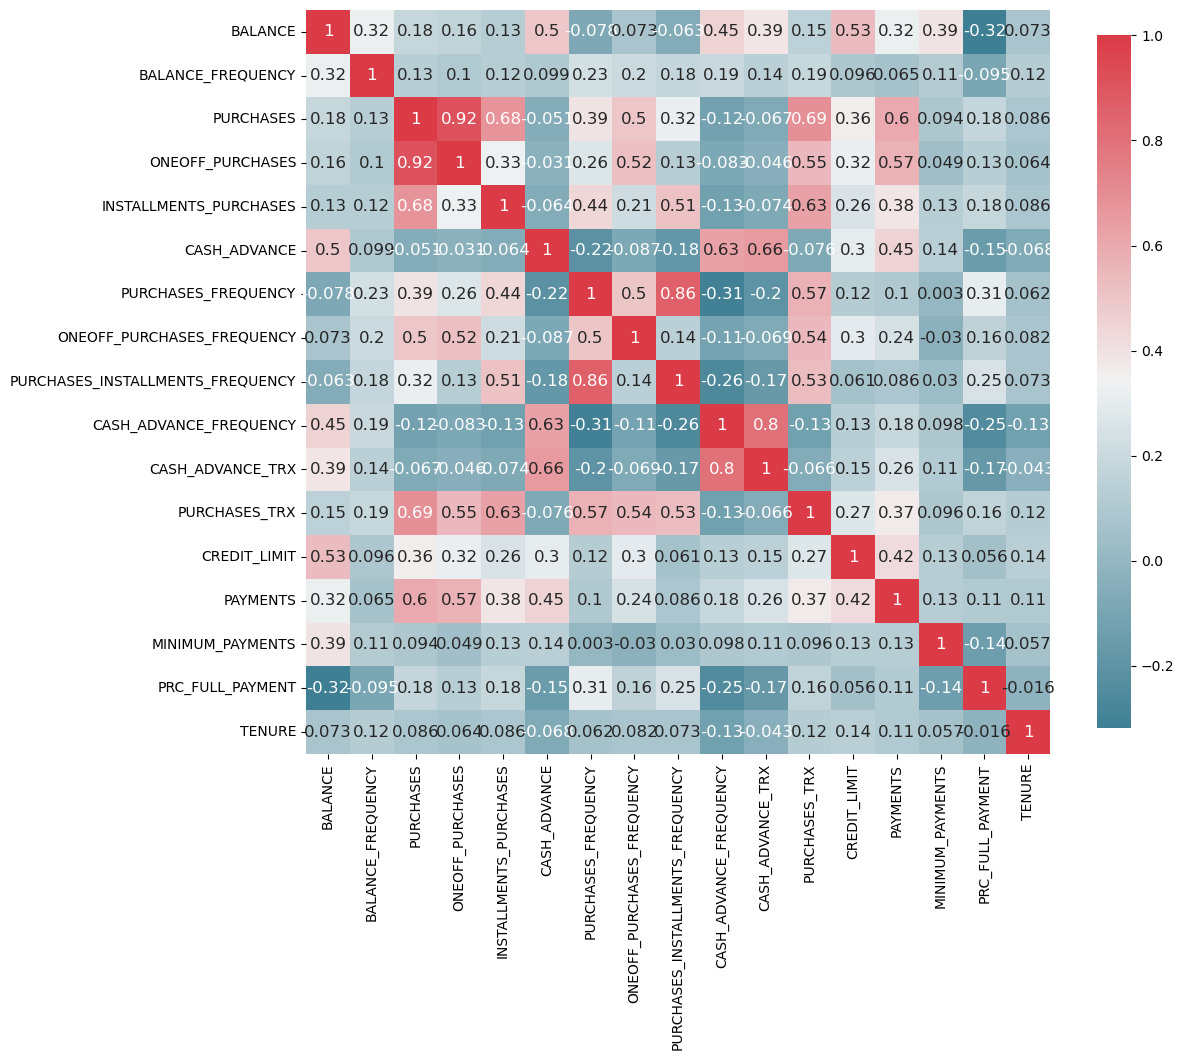

In [9]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
   
plot_correlation_map(df)   


In [10]:
#clustering our data 
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels=model.fit_predict(df)


In [11]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standarized=scaler.fit_transform(df)

In [13]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels2=model.fit_predict(standarized)

In [14]:
agglomerative=pd.DataFrame(clust_labels2)
agglomerative.value_counts()

1    8892
4      27
0      23
3       7
2       1
dtype: int64

In [15]:
#scalling and normalizing the data 

from sklearn.preprocessing import normalize 

from scipy.stats import zscore 
df_scaled=df.apply(zscore)
df_scaled=normalize(df_scaled)
normalized =pd.DataFrame(df_scaled,columns=df.columns)


In [16]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels3=model.fit_predict(normalized)
normalized['Agglo_clusters_labels']=clust_labels3

In [17]:
print("Agglomerative labels with standarization")
normalized['Agglo_clusters_labels'].value_counts()

Agglomerative labels with standarization


0    3424
1    2397
4    1387
2     873
3     869
Name: Agglo_clusters_labels, dtype: int64

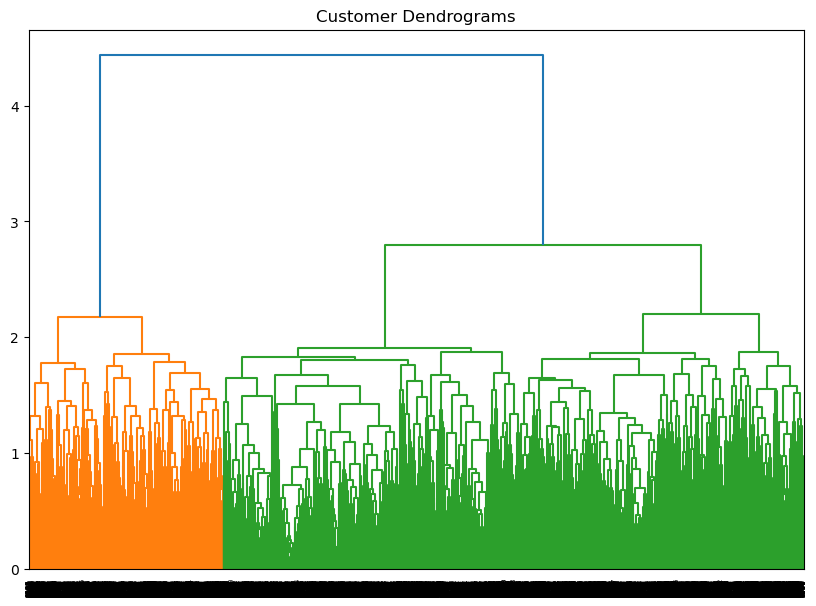

In [18]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(normalized, method="complete"))

In [39]:
from sklearn.cluster import KMeans #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(normalized)


KMeans(n_clusters=5, random_state=0)

In [40]:
labels=pd.DataFrame(kmeans.labels_)
normalized['k_means_labels']=labels
normalized['k_means_labels'].value_counts()

0    2256
1    2171
2    2045
3    1603
4     875
Name: k_means_labels, dtype: int64

In [41]:
d=[]
l=[]
for i in range (1,7):
    print("pour i = ",i)
    kmeans=KMeans(n_clusters=i, random_state=0) #Cluster our data by choosing 5 as number of clusters
    kmeans.fit(normalized)
    labels=pd.DataFrame(kmeans.labels_)
    normalized['k_means_labels']=labels
    normalized['k_means_labels'].value_counts()

pour i =  1
pour i =  2
pour i =  3
pour i =  4
pour i =  5
pour i =  6


In [67]:

k_values = [2, 3, 4, 5, 6, 7,8]

# Create an empty dictionary to store the results
results = {}

# Loop over each value of k
for k in k_values:
    # Initialize the k-means algorithm with the current value of k
    kmeans = KMeans(n_clusters=k)
    
    # Fit the algorithm to your dataset
    kmeans.fit(normalized)
    
    # Store the inertia (sum of squared distances of samples to their closest cluster center) for this k value
    labels=pd.DataFrame(kmeans.labels_)
    normalized['k_means_labels']=labels
    normalized['k_means_labels'].value_counts()
    results[k] =print( normalized['k_means_labels'].value_counts())
results.keys

0    5176
1    3774
Name: k_means_labels, dtype: int64
2    3424
0    3270
1    2256
Name: k_means_labels, dtype: int64
1    3424
3    2395
2    2256
0     875
Name: k_means_labels, dtype: int64
1    3424
2    2395
3    1387
4     875
0     869
Name: k_means_labels, dtype: int64
1    2395
3    2045
2    1387
4    1379
5     875
0     869
Name: k_means_labels, dtype: int64
0    2045
6    1406
1    1387
3    1379
2     989
4     875
5     869
Name: k_means_labels, dtype: int64
3    2045
4    1406
2    1387
5     989
1     875
6     869
7     766
0     613
Name: k_means_labels, dtype: int64


<function dict.keys>

In [70]:
k_values = [2, 3, 4, 5, 6, 7]

# Create an empty dictionary to store the results
results = {}

# Loop over each value of k
for k in k_values:
    # Initialize the k-means algorithm with the current value of k
    kmeans = KMeans(n_clusters=k)
    
    # Fit the algorithm to your dataset
    kmeans.fit(normalized)
    
    # Store the inertia (sum of squared distances of samples to their closest cluster center) for this k value
    results[k] = kmeans.inertia_

# Print the results
print("K Value\tInertia")
for k, inertia in results.items():
    print(f"{k}\t{inertia}")

# Find the best value of k (i.e. the value with the smallest inertia)
best_k = min(results, key=results.get)
print(f"The best value of k is {best_k} with inertia {results[best_k]}")

K Value	Inertia
2	35194.42729062333
3	23064.599890490117
4	17217.1994033909
5	12335.31180895952
6	7908.548054534223
7	5599.4261363962405
The best value of k is 7 with inertia 5599.4261363962405
